In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, normaltest, chi2_contingency, f_oneway
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
# Excercise Nomor 1: Tampilkan statistik deskriptif pada variable: Rooms, Distance, Landsize dan Price

df[['Rooms', 'Distance', 'Landsize', 'Price']].describe()

,Rooms,Distance,Landsize,Price
count,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,558.416127,1.075684e+06
std,0.955748,5.868725,3990.669241,6.393107e+05
min,1.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.100000,177.000000,6.500000e+05
50%,3.000000,9.200000,440.000000,9.030000e+05
75%,3.000000,13.000000,651.000000,1.330000e+06
max,10.000000,48.100000,433014.000000,9.000000e+06


In [4]:
# Excercice Nomor 2
# a) Berapa jumlah Rooms pada rumah yang harganya paling mahal?
print(df[df['Price'] == df['Price'].max()]['Rooms'])

# b) Berapa rata-rata harga rumah yang jarak ke CBD (variable Distance) terdekat?
print(df[df['Distance'] == df['Distance'].min()]['Price'].mean())

# c) Berapa rata-rata harga rumah yang luas tanahnya (Variable Landsize) 1 kali standar deviasi di atas rata-rata luas tanah?
df_rata_rata_dan_sd = df['Landsize'].mean() + (1 * df['Landsize'].std())
print(df[df['Landsize'] > df_rata_rata_dan_sd]['Price'].mean())

# d) Berapa rentang (range) harga rumah (variable Price) pada region Southern Metropolitan?
min_range = df[df['Regionname'] == 'Southern Metropolitan']['Price'].min()
max_range = df[df['Regionname'] == 'Southern Metropolitan']['Price'].max()
print(f'range = {min_range} - {max_range}')

12094    3
Name: Rooms, dtype: int64
671166.6666666666
880776.6666666666
range = 131000.0 - 8000000.0


In [5]:
# Excercise Nomor 3: Nilai outlier adalah nilai yang berada di bawah Q1 - (1.5 * IQR) atau di atas Q3 + (1.5 * IQR)
# a) Hitung dulu Q1, Q3 dan IQR pada kolom Price (harga rumah)
q1_data = df['Price'].quantile(q=0.25)
q3_data = df['Price'].quantile(q=0.75)

interquartile_range = q3_data - q1_data

min_data = q1_data - (1.5*interquartile_range)
max_data = q3_data + (1.5*interquartile_range)

print(f'Q1 = {q1_data}, Q3 = {q3_data}, IQR = {interquartile_range}')

# b) Hitung ada berapa nilai outlier pada kolom Price!
nilai_outlier = df[df['Price'] < min_data]['Price'].count() + df[df['Price'] > max_data]['Price'].count()
print(nilai_outlier)

Q1 = 650000.0, Q3 = 1330000.0, IQR = 680000.0
612


Shapiro Wilk Test: ShapiroResult(statistic=0.8328502932625694, pvalue=1.4465718615128594e-79)
DAgostino and Pearson Test: NormaltestResult(statistic=6894.345896172315, pvalue=0.0)


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13580.
  res = hypotest_fun_out(*samples, **kwds)


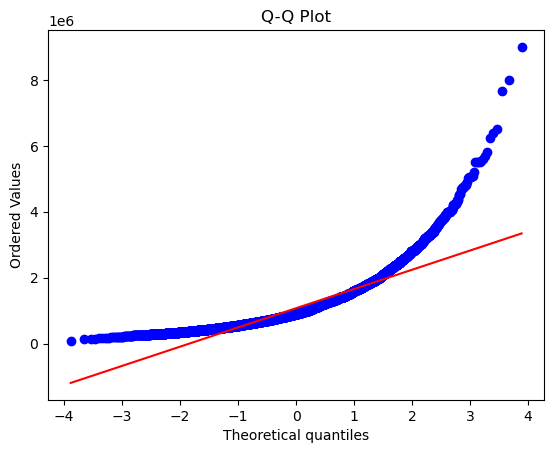

In [6]:
# Excercise Nomor 4: Lakukan Uji Asumsi normalitas pada variable harga rumah (Price)
# Menggunakan Shapiro Walk, D'Agostino and Pearson's Test

# Uji Normalitas Menggunakan Shapiro Wilk Test
# Setelah menjalani Uji Normalitas, P-Value = 0,000001,44 -> karena lebih kecil dari 0.05, maka data terdistribusi Normal
# Tapi tidak valid, karena datanya lebih dari 5000
print(f'Shapiro Wilk Test: {shapiro(df['Price'])}')

# Uji Normalitas menggunakan D'Agostino and Pearson's Test
# Setelah menjalani Uji Normalitas, P-Value = 0.0 -> karena lebih kecil dari 0.05, maka data tidak terdistribusi Normal
print(f'DAgostino and Pearson Test: {normaltest(df['Price'])}')

# Uji Normalitas menggunakan QQ Plot
stats.probplot(df['Price'], dist="norm", plot=plt)

plt.title("Q-Q Plot")
plt.show()

# Hasilnya adalah: Data tidak terdistribusi Normal

          Rooms     Price
Rooms  1.000000  0.539886
Price  0.539886  1.000000
          Rooms     Price
Rooms  1.000000  0.496634
Price  0.496634  1.000000
0.5398855194767743


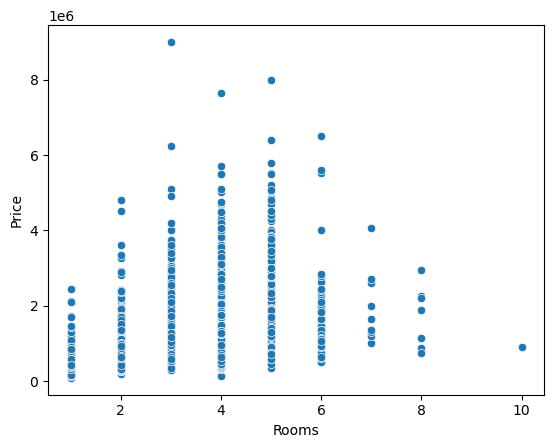

In [7]:
# Excercise Nomor 5: Jika Diasumsikan telah memenuhi syarat statistik parametrik
# Hitung seberapa kuat korelasi variabel Rooms dengan Price, serta arah korelasinya!

# Coba lihat pakai Scatterplot
# Tidak Valid menggunakan scatterplot, karena data yang digunakan data discrete
sns.scatterplot(
    data = df,
    x = 'Rooms',
    y = 'Price'
)
 
# Coba lihat pake fungsi korelasi
# Menggunakan Spearman kalau datanya tidak terdisribusi Normal
print(df[['Rooms', 'Price']].corr(method = 'spearman'))

# Menggunakan Pearson kalau datanya terdistribusi Normal
print(df[['Rooms', 'Price']].corr(method = 'pearson'))

print(df['Rooms'].corr(df['Price'], method='spearman'))

# Hasilnya adalah: Berkorelasi Positif


In [8]:
# Excercise Nomor 6 (cara 1): Dari beberapa Regionname, manakah Regionname yang variable jumlah kamarnya (Rooms) memiliki korelasi terkuat
# Dengan variable harga rumah (Price)
# Diasumsikan telah memenuhi syarat statistik parametrik

list_regionname = {}
corr_result = {}
temp_max_corr_result = 0
max_corr_result = {}

for index, row in df.iterrows():
    list_regionname[row['Regionname']] = {
        f'{row['Regionname']}'
    }

for key, item in list_regionname.items():
    corr_result[key] = df[df['Regionname'] == key]['Rooms'].corr(df[df['Regionname'] == key]['Price'], method = 'pearson')

for key, item in corr_result.items():
    if item > temp_max_corr_result:
        temp_max_corr_result = item
        max_corr_result = {
            key: temp_max_corr_result
        }

print(max_corr_result)

{'Southern Metropolitan': 0.6837438462796438}


In [9]:
# Excercise Nomor 6 (cara 2): Dari beberapa Regionname, manakah Regionname yang variable jumlah kamarnya (Rooms) memiliki korelasi terkuat
# Dengan variable harga rumah (Price)
# Diasumsikan telah memenuhi syarat statistik parametrik

corr_result = {}
temp_max_corr_result = 0
max_corr_result = {}

for region in df['Regionname'].unique():
    corr_result[region] = df[df['Regionname'] == region]['Rooms'].corr(df[df['Regionname'] == region]['Price'], method = 'pearson')

for key, item in corr_result.items():
    if item > temp_max_corr_result:
        temp_max_corr_result = item
        max_corr_result = {
            key: temp_max_corr_result
        }

print(max_corr_result)

{'Southern Metropolitan': 0.6837438462796438}


In [10]:
# Excercise Nomor 7: Jika diasumsikan tidak memenuhi syarat statistik parametrik
# Hitung seberapa kuat korelasi variabel Distance dengan Price, serta arah korelasinya!

print(df[['Distance', 'Price']].corr(method = 'spearman'))

print(df['Distance'].corr(df['Price'], method = 'spearman'))

          Distance    Price
Distance   1.00000 -0.12999
Price     -0.12999  1.00000
-0.12998984131880323


In [11]:
# Excercise Nomor 8: Dari beberapa Regionname 
# Manakah Regionname yang variabel jumlah jarak ke CBD (Distance) paling tidak berkorelasi dengan variabel harga rumah (Price)!


corr_result = {}
temp_min_corr_result = 0
min_corr_result = {}

for region in df['Regionname'].unique():
    corr_result[region] = df[df['Regionname'] == region]['Distance'].corr(df[df['Regionname'] == region]['Price'], method = 'pearson')

for key, item in corr_result.items():
    if item < temp_min_corr_result:
        temp_min_corr_result = item
        min_corr_result = {
            key: temp_min_corr_result
        }

print(min_corr_result)

{'Northern Metropolitan': -0.36855199617905093}


In [12]:
# Excercise Nomor 8 Lanjutan
# Serta tampilkan juga Regionname yang paling berkorelasi kedua variabel ini!

corr_result = {}
temp_max_corr_result = 0
max_corr_result = {}

for region in df['Regionname'].unique():
    corr_result[region] = df[df['Regionname'] == region]['Distance'].corr(df[df['Regionname'] == region]['Price'], method = 'pearson')


for key, item in corr_result.items():
    if item > temp_max_corr_result:
        temp_max_corr_result = item
        max_corr_result = {
            key: temp_max_corr_result
        }

dict_dataframe = {
    'Region Name': max_corr_result.keys(),
    'Correlation Result': max_corr_result.values()
}

df_result = pd.DataFrame(
    data = dict_dataframe
)

df_result

,Region Name,Correlation Result
0,Northern Victoria,0.089566


In [13]:
# Excercise Nomor 9: Uji hipotesis apakah metode pembelian/Method berkaitan dengan 
# Tipe rumah/Type (dependen) atau tidak saling berkaitan (independen)!

# Bisa memakai Chi-Squared Test
# Harus pake table kontingensi dengan memakai pd.crosstab

data = pd.crosstab(df['Type'], df['Method'])
print(data)

stat, p, dof, expected = chi2_contingency(data)

print(p)

alpha = 0.05

if p <= alpha:
    print('Kedua Variable berkaitan / Dependent (H0 Ditolak)') # -> Methode mempengaruhi Tipe
else:
    print('Kedua Variable tidak berkaitan / Independent (H0 Diterima)') # -> Methode tidak mempengaruhi Tipe


Method    PI     S  SA    SP   VB
Type                             
h       1069  6507  66  1079  728
t        134   723   7   143  107
u        361  1792  19   481  364
3.183702485154384e-22
Kedua Variable berkaitan / Dependent (H0 Ditolak)


In [14]:
# Excercise Nomor 10: Uji hipotesis apakah rata-rata harga rumah (Price) antar Regionname berbeda ataukah sama! 
# Diasumsikan persyaratan statistik parametrik terpenuhi
# H0: Rata-rata harga rumah antar regionname sama
# H1: Rata-rata harga rumah antar regionname tidak sama (at least ada 1 regionname yang rata-ratanya berbeda)

statistic, pvalue = f_oneway(df[df['Regionname'] == 'Northern Metropolitan']['Price'],
         df[df['Regionname'] == 'Western Metropolitan']['Price'],
         df[df['Regionname'] == 'Southern Metropolitan']['Price'],
         df[df['Regionname'] == 'Eastern Metropolitan']['Price'],
         df[df['Regionname'] == 'South-Eastern Metropolitan']['Price'],
         df[df['Regionname'] == 'Eastern Victoria']['Price'],
         df[df['Regionname'] == 'Northern Victoria']['Price'],
         df[df['Regionname'] == 'Western Victoria']['Price'],
    )

alpha = 0.05
print(statistic, pvalue)
if pvalue <= alpha:
    print('H0 Ditolak, Bearti H1 Diterima')
else:
    print('H0 Diterima, H1 Ditolak')

284.40018651008097 0.0
H0 Ditolak, Bearti H1 Diterima


In [15]:
temp_dict = {}

for region in df['Regionname'].unique():
    temp_dict[region] = df[df['Regionname'] == region]['Price'].mean()

dict_dataframe = {
    'Region Name': temp_dict.keys(),
    'Rata-Rata Region Name': temp_dict.values()
}
df_result = pd.DataFrame(
    data = dict_dataframe
)

df_result

,Region Name,Rata-Rata Region Name
0,Northern Metropolitan,8.981711e+05
1,Western Metropolitan,8.664205e+05
2,Southern Metropolitan,1.372963e+06
3,Eastern Metropolitan,1.104080e+06
4,South-Eastern Metropolitan,9.229438e+05
5,Eastern Victoria,6.999808e+05
6,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05
